In [43]:
import os
from openai import OpenAI
from dotenv import load_dotenv
import base64

# from utils import take_photo

# Import for image display
from PIL import Image
import matplotlib.pyplot as plt

In [44]:
load_dotenv()

XAI_API_KEY = os.getenv("XAI_API_KEY")

client = OpenAI(
    api_key=XAI_API_KEY,
    base_url="https://api.x.ai/v1",
)



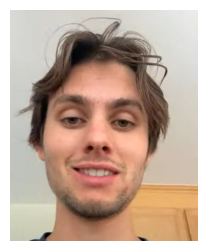

In [45]:
image_path = "../images/amade.png"


# Open and display the image
img = Image.open(image_path)
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.axis('off')
plt.show()

In [46]:

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode("utf-8")
    return encoded_string

In [47]:
# Getting the base64 string

base64_image = encode_image(image_path)

In [48]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{base64_image}",
                    "detail": "high",
                },
            },
            {
                "type": "text",
                "text": """
                You are an advanced facial analysis machine, 
                
                respond in the following format: 
                {
                    "overall score": 0,
                    "potential score": 0, 
                    "masculinity": 0,
                    "skin quality": 0,
                    "Jawline": 0,
                    "Hair": 0,
                    "Style": 0,
                    "Smile": 0,
                    "Visual Age": 0,
                    "Description": "provide a description of their appearance and potential age",
                    "Percentile for age": ex: Top 10%,
                    "image_quality": explain how good of a photo its is, if it is not a good photo explain how they could have choosen a better one.
                }

                Notes:
                - The overall score is a number between 0 and 100, and it is the sum of all the other scores.
                - Potential score should be what the person would rank if they improve on stats
                - For the description, It is important to sell the customer on what they can do to improve their score, talk about they life benefits of having a higher score with dating and social life.
                - Output must be in JSON format, with nothing preceding or following the JSON brackets
                """,
            },
        ],
    },
]

In [49]:
stream = client.chat.completions.create(
    model="grok-vision-beta",
    messages=messages,
    stream=True,
    temperature=0.01,
)

In [50]:
# Save the output to a variable
output = ""
for chunk in stream:
    if chunk.choices[0].delta.content is not None:
        output += chunk.choices[0].delta.content

print(output)
print("\n {x}", type(output))

{
    "overall score": 65,
    "potential score": 80,
    "masculinity": 70,
    "skin quality": 75,
    "Jawline": 65,
    "Hair": 60,
    "Style": 60,
    "Smile": 70,
    "Visual Age": 25,
    "Description": "Your appearance is quite appealing, with a friendly smile and a decent jawline. Improving your hairstyle and grooming could significantly enhance your look. A more defined style in clothing and perhaps some skincare routine could elevate your overall attractiveness. These improvements can boost your confidence, making you more appealing in social and dating scenarios, potentially leading to better personal and professional opportunities.",
    "Percentile for age": "Top 30%"
}

 {x} <class 'str'>


In [51]:
import json
data = json.loads(output)
print(data)


{'overall score': 65, 'potential score': 80, 'masculinity': 70, 'skin quality': 75, 'Jawline': 65, 'Hair': 60, 'Style': 60, 'Smile': 70, 'Visual Age': 25, 'Description': 'Your appearance is quite appealing, with a friendly smile and a decent jawline. Improving your hairstyle and grooming could significantly enhance your look. A more defined style in clothing and perhaps some skincare routine could elevate your overall attractiveness. These improvements can boost your confidence, making you more appealing in social and dating scenarios, potentially leading to better personal and professional opportunities.', 'Percentile for age': 'Top 30%'}
